## Spatial Data Science (GIS6307/GEO4930)

---

# Lab 5: Attribute Join and Spatial Join

In this lab, write Python code to complete the following tasks:
1. Read FL_tracts.shp, hospital.shp and population.csv into (geo)dataframes. Use appropriate libraries to read the different data types. Preview the (geo)dataframes to learn what they contain.
2. Join (attribute join) the population data to Florida census tracts. Calculate ratios of elderly population (>65 years old) in census tracts.
3. Join (spatial join) the health care facilities to Florida census tracts. Calculate total counts of health care facilities in census tracts. Then calculate the share of health care facilities per 1,000 elderly population.
4. Create a choropleth map to show the share of health care facilities per 1,000 elderly population in the census tracts.

<br>Instructor: Yi Qiang (qiangy@usf.edu)<br>

__Modified from Cong Ma's submission__



## 1. Install Python Libraries

In class, you have created a new environment and installed a number of python libraries (e.g. geopandas, rasterio...). **If you haven't done it** in class, Please follow [this instruction](https://github.com/qiang-yi/spatial_data_science/blob/main/other/new_env.ipynb) to set up an new environment and install GeoPandas and Rasterio. 

Activate the new environment (`geo`) from the folder where you saved this .ipynb file.

First, we import pandas and geopandas.

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

## 2. Read and Process Data

In [2]:
# Read the Florida census tracts
gdf = gpd.read_file("E:\Fall_2022\GIS6119\Lab5\lab5_data/FL_tracts.shp")

# Read the hospital.shp
hos = gpd.read_file("E:\Fall_2022\GIS6119\Lab5\lab5_data\hospitals.shp")

# Read the population.csv
pop = pd.read_csv("E:\Fall_2022\GIS6119\Lab5\lab5_data/population.csv")

## 3. Attribute Join

### Task 1. Join (attribute join) the population data to Florida census tracts. Calculate ratios of elderly population (>65 years old) in census tracts.

After previewing two data frames, the key for FL_tracts and population is 'GEOID' and 'Geography'

In [3]:
# Preview the Florida census tracts
gdf.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,12,011,110403,12011110403,1104.03,Census Tract 1104.03,G5020,S,1323099,0,+25.9882712,-080.2428385,"POLYGON ((-80.24758 25.99480, -80.24754 25.994..."
1,12,011,060114,12011060114,601.14,Census Tract 601.14,G5020,S,2598912,0,+26.1864137,-080.2598783,"POLYGON ((-80.26810 26.19368, -80.26702 26.193..."
2,12,011,060120,12011060120,601.20,Census Tract 601.20,G5020,S,12814719,1823779,+26.1433192,-080.3341825,"POLYGON ((-80.36670 26.12828, -80.36649 26.128..."
3,12,011,110347,12011110347,1103.47,Census Tract 1103.47,G5020,S,2846117,545293,+26.0230637,-080.4006685,"POLYGON ((-80.40957 26.03541, -80.40878 26.035..."
4,12,011,020421,12011020421,204.21,Census Tract 204.21,G5020,S,1060862,16632,+26.2129463,-080.2358809,"POLYGON ((-80.24061 26.22083, -80.24056 26.220..."


In [4]:
# Preview the population
pop.head()

,Geography,Geographic Area Name,Total population,Under 18 years,18 to 24 years,15 to 44 years,65 years and over,Median age (years),Sex ratio (males per 100 females)
0,1001020100,"Census Tract 201, Autauga County, Alabama",1941,415,217,736,295,38,101.6
1,1001020200,"Census Tract 202, Autauga County, Alabama",1757,325,119,837,284,35.6,135.2
2,1001020300,"Census Tract 203, Autauga County, Alabama",3694,929,288,1542,464,35.5,99.1
3,1001020400,"Census Tract 204, Autauga County, Alabama",3539,510,254,1245,969,47.7,102.8
4,1001020501,"Census Tract 205.01, Autauga County, Alabama",4306,1136,319,1747,541,35.4,103.4


In [5]:
# Get the data type of each column
gdf.dtypes

STATEFP       object
COUNTYFP      object
TRACTCE       object
GEOID         object
NAME          object
NAMELSAD      object
MTFCC         object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [6]:
# Convert the data type of GEOID in FL_tracts.shp from object to int
gdf['GEOID'] = gdf['GEOID'].astype('int64')
gdf.dtypes

STATEFP       object
COUNTYFP      object
TRACTCE       object
GEOID          int64
NAME          object
NAMELSAD      object
MTFCC         object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

Merge the two data frames by matching key1 in the left dataframe and key2

In [7]:
atjoin = gdf.merge(pop, left_on='GEOID',right_on='Geography')

# Preview the joined data
atjoin.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,geometry,Geography,Geographic Area Name,Total population,Under 18 years,18 to 24 years,15 to 44 years,65 years and over,Median age (years),Sex ratio (males per 100 females)
0,12,011,110403,12011110403,1104.03,Census Tract 1104.03,G5020,S,1323099,0,...,"POLYGON ((-80.24758 25.99480, -80.24754 25.994...",12011110403,"Census Tract 1104.03, Broward County, Florida",4859,944,417,2007,535,39.5,105.2
1,12,011,060114,12011060114,601.14,Census Tract 601.14,G5020,S,2598912,0,...,"POLYGON ((-80.26810 26.19368, -80.26702 26.193...",12011060114,"Census Tract 601.14, Broward County, Florida",6635,1719,285,2313,635,37.6,88.3
2,12,011,060120,12011060120,601.20,Census Tract 601.20,G5020,S,12814719,1823779,...,"POLYGON ((-80.36670 26.12828, -80.36649 26.128...",12011060120,"Census Tract 601.20, Broward County, Florida",6817,1296,543,3087,703,39.9,97.3
3,12,011,110347,12011110347,1103.47,Census Tract 1103.47,G5020,S,2846117,545293,...,"POLYGON ((-80.40957 26.03541, -80.40878 26.035...",12011110347,"Census Tract 1103.47, Broward County, Florida",5612,1278,742,2323,673,43,75.6
4,12,011,020421,12011020421,204.21,Census Tract 204.21,G5020,S,1060862,16632,...,"POLYGON ((-80.24061 26.22083, -80.24056 26.220...",12011020421,"Census Tract 204.21, Broward County, Florida",4208,1199,525,1984,377,31,71.3


Next, we print the shapes of Florida census, population and atjoin. 

In [8]:
print('shape of FL_census: '+ str(gdf.shape))

print('shape of Population: '+ str(pop.shape))

print('shape of ajoin: '+ str(atjoin.shape))

shape of FL_census: (5160, 13)
shape of Population: (85395, 9)
shape of ajoin: (5160, 22)


Print all column names in ajoin

In [9]:
atjoin.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry',
       'Geography', 'Geographic Area Name', 'Total population',
       'Under 18 years', '18 to 24 years', '15 to 44 years',
       '65 years and over', 'Median age (years)',
       'Sex ratio (males per 100 females)'],
      dtype='object')

Calculate ratios of elderly population (>65 years old) in census tracts.

In [10]:
atjoin['ratio'] =atjoin['65 years and over']/atjoin['Total population']

# Preview ratio in ajoin
atjoin[['GEOID','ratio']].head()

,GEOID,ratio
0,12011110403,0.110105
1,12011060114,0.095705
2,12011060120,0.103125
3,12011110347,0.119922
4,12011020421,0.089591


## 4. Spatial Join

<AxesSubplot:>

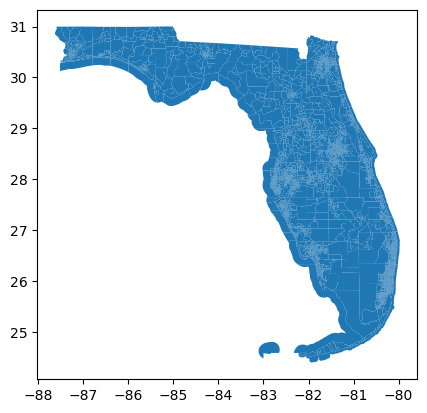

In [11]:
#Plot the Florida census tract boundaries
gdf.plot()

<AxesSubplot:>

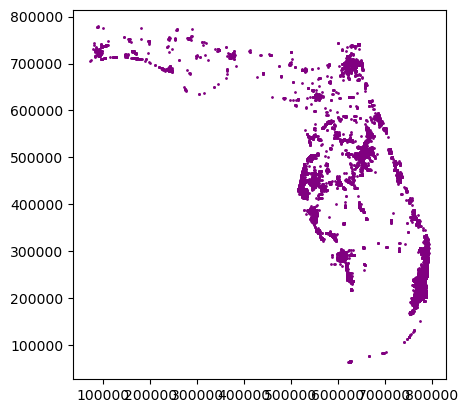

In [12]:
#Plot the hospital locations
hos.plot(color = 'purple', markersize = 1)

Next, we add basemap beneath the two layers, to give background information of the study area.

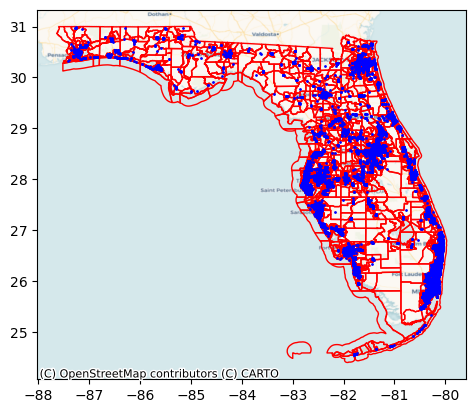

In [13]:
# Import contextily
import contextily as cx

# Add the Florida census tract boundaries
ax = gdf.to_crs(epsg=4269).plot(facecolor = 'none', edgecolor='red')

# Add hospital listings
hos.to_crs(epsg=4269).plot(ax = ax, color = 'blue', markersize = 1)

# Add the basemap
cx.add_basemap(ax = ax, source = cx.providers.CartoDB.Voyager, crs = 'EPSG:4269')

### Task 2. Join (spatial join) the health care facilities to Florida census tracts. Calculate total counts of health care facilities in census tracts. Then calculate the share of health care facilities per 1,000 elderly population.

In [14]:
# Project the hospital feature
rephos = hos.to_crs(epsg=4269)

# Join (spatial join) the health care facilities to Florida census tracts.
#spjoin = gpd.sjoin(gdf, rephos, predicate='contains')

spjoin = rephos.sjoin(gdf,how = 'right',predicate='within')

# Preview the joined data
spjoin.head()

,index_left,OBJECTID,PARCELID,NAME_left,ADDRESS,CITY,ZIPCODE,COUNTY,PHONE,TYPE,...,GEOID,NAME_right,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12011110403,1104.03,Census Tract 1104.03,G5020,S,1323099,0,+25.9882712,-080.2428385,"POLYGON ((-80.24758 25.99480, -80.24754 25.994..."
1,1801.0,1640.0,NONE,"GAJRAJ, BOB M MD PA",4966 PINE ISLAND ROAD,FORT LAUDERDALE,33351.0,BROWARD,954-748-8600,MEDICAL DOCTOR,...,12011060114,601.14,Census Tract 601.14,G5020,S,2598912,0,+26.1864137,-080.2598783,"POLYGON ((-80.26810 26.19368, -80.26702 26.193..."
2,2990.0,1942.0,494035100010,BAPTIST HEALTH URGENT CARE AT SAWGRASS,12472 W SUNRISE BOULEVARD,FORT LAUDERDALE,33323.0,BROWARD,954-837-1240,MEDICAL DOCTOR,...,12011060120,601.20,Census Tract 601.20,G5020,S,12814719,1823779,+26.1433192,-080.3341825,"POLYGON ((-80.36670 26.12828, -80.36649 26.128..."
2,2712.0,1072.0,494026050132,BROWARD SURGICAL SPECIALISTS,"12651 W SUNRISE BOULEVARD, SUITE 202",FORT LAUDERDALE,33323.0,BROWARD,954-838-8809,MEDICAL DOCTOR,...,12011060120,601.20,Census Tract 601.20,G5020,S,12814719,1823779,+26.1433192,-080.3341825,"POLYGON ((-80.36670 26.12828, -80.36649 26.128..."
2,399.0,1269.0,494026050132,WESTSIDE PRIMARY CARE,"12651 W SUNRISE BOULEVARD, SUITE 202",FORT LAUDERDALE,33323.0,BROWARD,954-838-8801,MEDICAL DOCTOR,...,12011060120,601.20,Census Tract 601.20,G5020,S,12814719,1823779,+26.1433192,-080.3341825,"POLYGON ((-80.36670 26.12828, -80.36649 26.128..."


In [15]:
spjoin.columns

Index(['index_left', 'OBJECTID', 'PARCELID', 'NAME_left', 'ADDRESS', 'CITY',
       'ZIPCODE', 'COUNTY', 'PHONE', 'TYPE', 'FDOH_ID', 'OWNER', 'OPERATING',
       'OP_CLASS', 'FSOURCE', 'DATASOURCE', 'LAT_DD', 'LONG_DD', 'MGRS',
       'GCID', 'DESCRIPT', 'FLAG', 'UPDATE_DAY', 'FGDLAQDATE', 'AUTOID',
       'STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME_right', 'NAMELSAD',
       'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON',
       'geometry'],
      dtype='object')

Next, we print the shapes of Florida census, hospital and sjoin. 

In [16]:
print('shape of FL_census: '+ str(gdf.shape))

print('shape of Hospital: '+ str(pop.shape))

print('shape of spjoin: '+ str(spjoin.shape))

shape of FL_census: (5160, 13)
shape of Hospital: (85395, 9)
shape of spjoin: (20604, 38)


Next, we collapse the rows with identical polygons into one, and keep aggregated values (e.g. count, mean) of hospital in the polygon.

We can do this by groupby the GEOID column. Then, calculate total counts of health care facilities in census tracts.

In [17]:
# Count the number of NaN data to 0
count = spjoin.groupby(['GEOID'])['index_left'].agg(['count']).rename(columns={'count':'Hospital'})
count

,Hospital
GEOID,
12001000201,9
12001000202,4
12001000301,3
12001000302,0
12001000400,3
...,...
12133970104,2
12133970200,0
12133970301,1


In [18]:
hos.columns

Index(['OBJECTID', 'PARCELID', 'NAME', 'ADDRESS', 'CITY', 'ZIPCODE', 'COUNTY',
       'PHONE', 'TYPE', 'FDOH_ID', 'OWNER', 'OPERATING', 'OP_CLASS', 'FSOURCE',
       'DATASOURCE', 'LAT_DD', 'LONG_DD', 'MGRS', 'GCID', 'DESCRIPT', 'FLAG',
       'UPDATE_DAY', 'FGDLAQDATE', 'AUTOID', 'geometry'],
      dtype='object')

Then, we join (attribute join) the hospital count in each GEOID (polygon) back to the Florida census boundary, using GEOID as the key.

In [19]:
hospitals_count = atjoin.merge(count, on='GEOID')

#hospitals_count.head()
hospitals_count.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,Geographic Area Name,Total population,Under 18 years,18 to 24 years,15 to 44 years,65 years and over,Median age (years),Sex ratio (males per 100 females),ratio,Hospital
0,12,011,110403,12011110403,1104.03,Census Tract 1104.03,G5020,S,1323099,0,...,"Census Tract 1104.03, Broward County, Florida",4859,944,417,2007,535,39.5,105.2,0.110105,0
1,12,011,060114,12011060114,601.14,Census Tract 601.14,G5020,S,2598912,0,...,"Census Tract 601.14, Broward County, Florida",6635,1719,285,2313,635,37.6,88.3,0.095705,1
2,12,011,060120,12011060120,601.20,Census Tract 601.20,G5020,S,12814719,1823779,...,"Census Tract 601.20, Broward County, Florida",6817,1296,543,3087,703,39.9,97.3,0.103125,8
3,12,011,110347,12011110347,1103.47,Census Tract 1103.47,G5020,S,2846117,545293,...,"Census Tract 1103.47, Broward County, Florida",5612,1278,742,2323,673,43,75.6,0.119922,4
4,12,011,020421,12011020421,204.21,Census Tract 204.21,G5020,S,1060862,16632,...,"Census Tract 204.21, Broward County, Florida",4208,1199,525,1984,377,31,71.3,0.089591,0


## 5. Creating choropleth maps

Then calculate the share of health care facilities per 1,000 elderly population.

In [20]:
hospitals_count['Facilities'] = hospitals_count['Hospital']/hospitals_count['65 years and over']*1000

In [21]:
# Avoiding ZeroDivisionError: division by zero, Replace infs with NaN
hospitals_count['Facilities'].replace([np.inf, -np.inf], np.nan, inplace=True)

hospitals_count.sort_values(['65 years and over'], ascending=True)

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,Total population,Under 18 years,18 to 24 years,15 to 44 years,65 years and over,Median age (years),Sex ratio (males per 100 females),ratio,Hospital,Facilities
1738,12,055,980100,12055980100,9801,Census Tract 9801,G5020,S,215810021,4730547,...,0,0,0,0,0,-,-,NaN,0,NaN
184,12,091,990200,12091990200,9902,Census Tract 9902,G5020,S,0,95837898,...,0,0,0,0,0,-,-,NaN,0,NaN
101,12,131,990000,12131990000,9900,Census Tract 9900,G5020,S,0,659907762,...,0,0,0,0,0,-,-,NaN,0,NaN
3462,12,099,007849,12099007849,78.49,Census Tract 78.49,G5020,S,5345384,0,...,295,99,0,129,0,43.3,70.5,0.000000,0,NaN
99,12,055,980200,12055980200,9802,Census Tract 9802,G5020,S,7675673,68881,...,0,0,0,0,0,-,-,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,12,119,911704,12119911704,9117.04,Census Tract 9117.04,G5020,S,11581445,473350,...,5787,99,122,182,4847,75.1,97.8,0.837567,0,0.000000
3245,12,119,911207,12119911207,9112.07,Census Tract 9112.07,G5020,S,4412292,0,...,6100,0,0,0,5537,70.9,80.4,0.907705,0,0.000000
3246,12,119,911206,12119911206,9112.06,Census Tract 9112.06,G5020,S,4306791,0,...,6795,0,0,0,6343,72.7,94.9,0.933481,0,0.000000
971,12,119,911204,12119911204,9112.04,Census Tract 9112.04,G5020,S,18040860,1244344,...,10873,510,0,862,8310,70.8,88.9,0.764278,0,0.000000


### Task 4. Create a choropleth map to show the share of health care facilities per 1,000 elderly population in the census tracts.

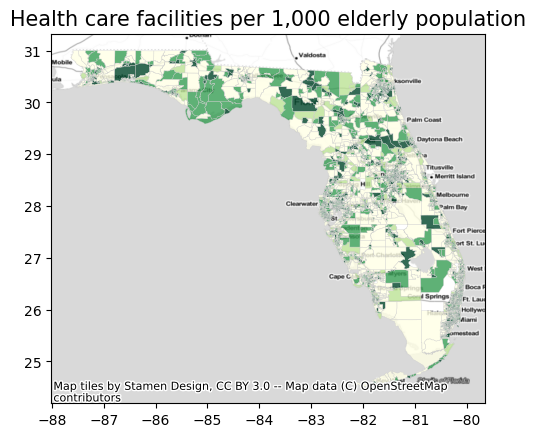

In [22]:
# Add the neighborhood boundaries
ax = hospitals_count.to_crs(epsg=4269).plot(column='Facilities', cmap='YlGn',k=4,
                                            scheme='quantiles',linewidth=0.3,edgecolor='0.8',alpha=0.8);
ax.set_title('Health care facilities per 1,000 elderly population', fontsize=15)

# Add the basemap
cx.add_basemap(ax = ax, source = cx.providers.Stamen.TonerLite, crs = 'EPSG:4269')